In [ ]:
#default_exp datasets

# Datasets

> helper functions for loading timeseries datasets

### UCR

In [ ]:
#export
from torchtools.data import *

In [ ]:
#export
import numpy as np
#import torch
from fastai2.torch_basics import *
from fastai2.data.all import *
from fastai2.callback.all import *

All of the UCR functions are ported from https://github.com/timeseriesAI/timeseriesAI to work with fastai2.

In [ ]:
import os
import tempfile
try: from urllib import urlretrieve
except ImportError: from urllib.request import urlretrieve
import shutil
from pyunpack import Archive
from scipy.io import arff

In [ ]:
#TSUtilities
def To3dArray(arr):
    arr = ToArray(arr)
    if arr.ndim == 1: arr = arr[None, None]
    elif arr.ndim == 2: arr = arr[:, None]
    elif arr.ndim == 4: arr = arr[0]
    assert arr.ndim == 3, 'Please, review input dimensions'
    return np.array(arr)

def ToArray(arr):
    if isinstance(arr, torch.Tensor):
        arr = np.array(arr)
    elif not isinstance(arr, np.ndarray):
        print(f"Can't convert {type(arr)} to np.array")
    if arr.dtype == 'O': arr = np.array(arr, dtype=np.float32)
    return arr


In [ ]:
def decompress_from_url(url, target_dir=None, verbose=False):
    """Downloads a compressed file from its URL and uncompresses it.

    Parameters
    ----------
    url : string
        URL from which to download.
    target_dir : str or None (default: None)
        Directory to be used to extract downloaded files.
    verbose : bool (default: False)
        Whether to print information about the process (cached files used, ...)

    Returns
    -------
    str or None
        Directory in which the compressed file has been extracted if the process was
        successful, None otherwise
    """
    try:
        fname = os.path.basename(url)
        tmpdir = tempfile.mkdtemp()
        local_comp_fname = os.path.join(tmpdir, fname)
        urlretrieve(url, local_comp_fname)
    except:
        shutil.rmtree(tmpdir)
        if verbose:
            sys.stderr.write("Could not download url. Please, check url.\n")
    try:
        if not os.path.exists(target_dir): os.makedirs(target_dir)
        Archive(local_comp_fname).extractall(target_dir)
        shutil.rmtree(tmpdir)
        if verbose:
            print("Successfully extracted file %s to path %s" %
                  (local_comp_fname, target_dir))
        return target_dir
    except:
        shutil.rmtree(tmpdir)
        if verbose:
            sys.stderr.write("Could not uncompress file, aborting.\n")
        return None



def get_UCR_univariate_list():
    return sorted([
        'ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY',
        'AllGestureWiimoteZ', 'ArrowHead', 'AsphaltObstacles', 'BME', 'Beef',
        'BeetleFly', 'BirdChicken', 'CBF', 'Car', 'Chinatown',
        'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers',
        'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction',
        'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect',
        'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame',
        'DodgerLoopWeekend', 'ECG200', 'ECG5000', 'ECGFiveDays',
        'EOGHorizontalSignal', 'EOGVerticalSignal', 'Earthquakes',
        'ElectricDevices', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR',
        'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain',
        'FreezerSmallTrain', 'Fungi', 'GestureMidAirD1', 'GestureMidAirD2',
        'GestureMidAirD3', 'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint',
        'GunPointAgeSpan', 'GunPointMaleVersusFemale',
        'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring',
        'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain',
        'InsectEPGSmallTrain', 'InsectWingbeatSound', 'ItalyPowerDemand',
        'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat',
        'MedicalImages', 'MelbournePedestrian', 'MiddlePhalanxOutlineAgeGroup',
        'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxTW',
        'MixedShapesRegularTrain', 'MixedShapesSmallTrain', 'MoteStrain',
        'NonInvasiveFetalECGThorax1', 'NonInvasiveFetalECGThorax2', 'OSULeaf',
        'OliveOil', 'PLAID', 'PhalangesOutlinesCorrect', 'Phoneme',
        'PickupGestureWiimoteZ', 'PigAirwayPressure', 'PigArtPressure',
        'PigCVP', 'Plane', 'PowerCons', 'ProximalPhalanxOutlineAgeGroup',
        'ProximalPhalanxOutlineCorrect', 'ProximalPhalanxTW',
        'RefrigerationDevices', 'Rock', 'ScreenType', 'SemgHandGenderCh2',
        'SemgHandMovementCh2', 'SemgHandSubjectCh2', 'ShakeGestureWiimoteZ',
        'ShapeletSim', 'ShapesAll', 'SmallKitchenAppliances', 'SmoothSubspace',
        'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'StarLightCurves',
        'Strawberry', 'SwedishLeaf', 'Symbols', 'SyntheticControl',
        'ToeSegmentation1', 'ToeSegmentation2', 'Trace', 'TwoLeadECG',
        'TwoPatterns', 'UMD', 'UWaveGestureLibraryAll', 'UWaveGestureLibraryX',
        'UWaveGestureLibraryY', 'UWaveGestureLibraryZ', 'Wafer', 'Wine',
        'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga'
    ])


def get_UCR_multivariate_list():
    return sorted([
        'ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions',
        'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'ERing',
        'EigenWorms', 'Epilepsy', 'EthanolConcentration', 'FaceDetection',
        'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat',
        'InsectWingbeat', 'JapaneseVowels', 'LSST', 'Libras', 'MotorImagery',
        'NATOPS', 'PEMS-SF', 'PenDigits', 'PhonemeSpectra', 'RacketSports',
        'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits',
        'StandWalkJump', 'UWaveGestureLibrary'
    ])


In [ ]:
def get_UCR_univariate(sel_dataset, parent_dir='data/UCR', verbose=False, drop_na=False, check=True):
    if check and sel_dataset not in get_UCR_univariate_list():
        print('This dataset does not exist. Please select one from this list:')
        print(get_UCR_univariate_list())
        return None, None, None, None
    if verbose: print('Dataset:', sel_dataset)
    src_website = 'http://www.timeseriesclassification.com/Downloads/'
    tgt_dir = Path(parent_dir) / sel_dataset
    if verbose: print('Downloading and decompressing data...')
    if not os.path.isdir(tgt_dir):
        decompress_from_url(
            src_website + sel_dataset + '.zip', target_dir=tgt_dir, verbose=verbose)
    if verbose: print('...data downloaded and decompressed')
    fname_train = sel_dataset + "_TRAIN.arff"
    fname_test = sel_dataset + "_TEST.arff"

    train_df = pd.DataFrame(arff.loadarff(os.path.join(tgt_dir, fname_train))[0])
    test_df = pd.DataFrame(arff.loadarff(os.path.join(tgt_dir, fname_test))[0])
    unique_cats = train_df.iloc[:, -1].unique()
    mapping = dict(zip(unique_cats, np.arange(len(unique_cats))))
    train_df = train_df.replace({train_df.columns.values[-1]: mapping})
    test_df = test_df.replace({test_df.columns.values[-1]: mapping})
    if drop_na:
        train_df.dropna(axis=1, inplace=True)
        test_df.dropna(axis=1, inplace=True)

    X_train = train_df.iloc[:, :-1].values.astype(np.float32)
    X_test = test_df.iloc[:, :-1].values.astype(np.float32)
    y_train = train_df.iloc[:, -1].values.astype(int)
    y_test = test_df.iloc[:, -1].values.astype(int)

    X_train = To3dArray(X_train)
    X_test = To3dArray(X_test)

    if verbose:
        print('Successfully extracted dataset\n')
        print('X_train:', X_train.shape)
        print('y_train:', y_train.shape)
        print('X_valid:', X_test.shape)
        print('y_valid:', y_test.shape, '\n')
    return X_train, y_train, X_test, y_test



def get_UCR_multivariate(sel_dataset, parent_dir='data/UCR', verbose=False, check=True):
    if sel_dataset.lower() == 'mphoneme': sel_dataset = 'Phoneme'
    if check and sel_dataset not in get_UCR_multivariate_list():
        print('This dataset does not exist. Please select one from this list:')
        print(get_UCR_multivariate_list())
        return None, None, None, None
    if verbose: print('Dataset:', sel_dataset)
    src_website = 'http://www.timeseriesclassification.com/Downloads/'
    tgt_dir = Path(parent_dir) / sel_dataset

    if verbose: print('Downloading and decompressing data...')
    if not os.path.isdir(tgt_dir):
        decompress_from_url(
            src_website + sel_dataset + '.zip', target_dir=tgt_dir, verbose=verbose)
    if verbose: print('...data downloaded and decompressed')
    if verbose: print('Extracting data...')
    X_train_ = []
    X_test_ = []
    for i in range(10000):
        if not os.path.isfile(
                f'{parent_dir}/{sel_dataset}/{sel_dataset}Dimension'
                + str(i + 1) + '_TRAIN.arff'):
            break
        train_df = pd.DataFrame(
            arff.loadarff(
                f'{parent_dir}/{sel_dataset}/{sel_dataset}Dimension'
                + str(i + 1) + '_TRAIN.arff')[0])
        unique_cats = train_df.iloc[:, -1].unique()
        mapping = dict(zip(unique_cats, np.arange(len(unique_cats))))
        train_df = train_df.replace({train_df.columns.values[-1]: mapping})
        test_df = pd.DataFrame(
            arff.loadarff(
                f'{parent_dir}/{sel_dataset}/{sel_dataset}Dimension'
                + str(i + 1) + '_TEST.arff')[0])
        test_df = test_df.replace({test_df.columns.values[-1]: mapping})
        X_train_.append(train_df.iloc[:, :-1].values)
        X_test_.append(test_df.iloc[:, :-1].values)

    if verbose: print('...extraction complete')
    X_train = np.stack(X_train_, axis=-1)
    X_test = np.stack(X_test_, axis=-1)

    # In this case we need to rearrange the arrays ()
    X_train = np.transpose(X_train, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))

    y_train = np.array([int(float(x)) for x in train_df.iloc[:, -1]])
    y_test = np.array([int(float(x)) for x in test_df.iloc[:, -1]])

    if verbose:
        print('Successfully extracted dataset\n')
        print('X_train:', X_train.shape)
        print('y_train:', y_train.shape)
        print('X_valid:', X_test.shape)
        print('y_valid:', y_test.shape, '\n')
    return X_train, y_train, X_test, y_test


def get_UCR_data(dsid, parent_dir='data/UCR', verbose=False, check=True):
    if dsid in get_UCR_univariate_list():
        return get_UCR_univariate(dsid, verbose=verbose, check=check)
    elif dsid in get_UCR_multivariate_list():
        return get_UCR_multivariate(dsid, verbose=verbose, check=check)
    else:
        print(f'This {dsid} dataset does not exist. Please select one from these lists:')
        print('\nunivariate datasets')
        print(get_UCR_univariate_list())
        print('\nmultivariate datasets')
        print(get_UCR_multivariate_list(), '\n')
        return None, None, None, None


In [ ]:
datasets_uni = get_UCR_univariate_list()
datasets_multi = get_UCR_multivariate_list()

In [ ]:
dataset_uni[-5:], dataset_multi[-5:]

(['Wine', 'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga'],
 ['SelfRegulationSCP1',
  'SelfRegulationSCP2',
  'SpokenArabicDigits',
  'StandWalkJump',
  'UWaveGestureLibrary'])

In [ ]:
dset = get_UCR_multivariate('UWaveGestureLibrary')

In [ ]:
# dset = get_UCR_univariate('Wine')

In [ ]:
dset[3].shape

(320,)

In [ ]:
from torchtools.augmentations import RandAugment

In [ ]:
raug = RandAugment(magnitude=0.1)

In [ ]:
raug(TSTensor(torch.rand(1,10)))

yscale
timewarp


TSTensor([[0.2950, 0.0567, 0.3979, 0.9327, 0.4487, 0.6921, 0.9971, 0.3785, 0.6355,
         0.2131]])

ywarp
ynormal


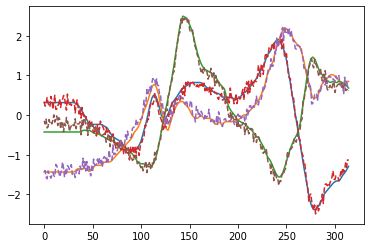

In [ ]:
plt.plot(dset[0][0].T, label='orig')
plt.plot(raug(TSTensor(dset[0][0])).T, linestyle='dashed',label='randaug');

In [ ]:
def ucr_to_items(dset):
    '''
    create items for DataBlock from a UCR dset
    '''
    x_train, y_train, x_test, y_test = dset
    n_train = x_train.shape[0]
    return list(zip(np.concatenate([x_train, x_test]), np.concatenate([y_train, y_test]))), n_train
    
    

### Dataframe

### DataBlock

In [ ]:
#hide
## this is the dataframe version
class NormalizeTS(Normalize):
    def __init__(self, mean=None, std=None, axes=(0,2), ts_names=None): 
        super().__init__(mean=mean, std=std, axes=axes)
        self.ts_names = ts_names
        self.n_channels = len(self.ts_names)
        self.device = default_device()
    
    def setups(self, x):
        self.means = [np.nanmean(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.stds = [np.nanstd(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.means = tensor(self.means)[None,:,None].to(self.device)
        self.stds = tensor(self.stds)[None,:,None].to(self.device)
        
    
    def encodes(self, x:TSTensor):
#         print(type(x))
#         print(x.device)
        return (x-self.means)/self.stds
#         return x
#     @classmethod
#     def from_df()
    
    def decodes(self, x:TSTensor):
        return (x*self.stds)-self.means

In [ ]:
#hide
## this is the dataframe version
class NormalizeTS(Normalize):
    def __init__(self, mean=None, std=None, axes=(0,2)): 
        super().__init__(mean=mean, std=std, axes=axes)
        self.device = default_device()
        self.means, self.stds = tensor(mean)[None, :, None].to(self.device), tensor(std)[None,:,None].to(self.device)
#     def setups(self, x):
        
#         self.means = [np.nanmean(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
#         self.stds = [np.nanstd(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
#         self.means = tensor(self.means)[None,:,None].to(self.device)
#         self.stds = tensor(self.stds)[None,:,None].to(self.device)
        
    
    def encodes(self, x:TSTensor):
        print('normalize')
#         print(type(x))
#         print(x.device)
        return (x-self.means)/self.stds
#         return x
#     @classmethod
#     def from_df()
    
    def decodes(self, x:TSTensor):
        return (x*self.stds)-self.means

In [ ]:
x_train, y_train, x_test, y_test = dset
means, stds = x_train.mean((0,2)), x_train.std((0,2))

In [ ]:
class TensorInt(TensorBase): pass

In [ ]:
def create_items(dset):
    '''
    create items for DataBlock from a UCR dset
    '''
    x_train, y_train, x_test, y_test = dset
    n_train = x_train.shape[0]
    return list(zip(np.concatenate([x_train, x_test]), np.concatenate([y_train, y_test]))), n_train
    
    

In [ ]:
items, n_train = create_items(dset)

In [ ]:
valid_idx = list(range(n_train, len(items)))

In [ ]:
len(items)

440

In [ ]:
get_x = lambda x:TSTensor(torch.tensor(x[0]).float())
get_y = lambda x: x[1]

In [ ]:
dblock = DataBlock(blocks=(TransformBlock, CategoryBlock),splitter=RandomSplitter(), get_x=get_x, get_y=get_y,
                  batch_tfms=RandAugment)

In [ ]:
dblock = DataBlock(blocks=(TransformBlock, CategoryBlock),splitter=IndexSplitter(valid_idx),
                   get_x=get_x, get_y=get_y, batch_tfms=RandAugment(magnitude=0.2))

In [ ]:
dblock = DataBlock(blocks=(TransformBlock, CategoryBlock),splitter=IndexSplitter(valid_idx),
                   get_x=get_x, get_y=get_y)

In [ ]:
dblock = DataBlock(blocks=(TransformBlock, CategoryBlock),splitter=IndexSplitter(valid_idx),
                   get_x=get_x, get_y=get_y, batch_tfms=[RandAugment(magnitude=0.2), 
                                                         NormalizeTS(mean=means, std=stds)])

In [ ]:
dloaders = dblock.dataloaders(items, bs=8)

normalize


In [ ]:
xb,yb = dloaders.train.one_batch()

yscale
timewarp
normalize


In [ ]:
xb,yb = dloaders.valid.one_batch()

normalize


In [ ]:
xb.std((0,2))

TSTensor([0.9733, 0.9702, 0.9726], device='cuda:0')

In [ ]:
dloaders.after_batch

Pipeline: (#1) [RandAugment: False (TSTensor,object) -> encodes ]

ywarp
yscale
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu


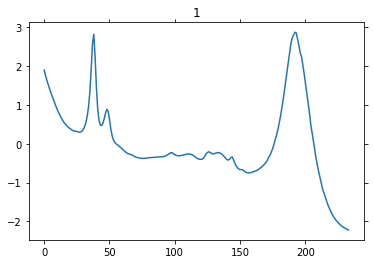

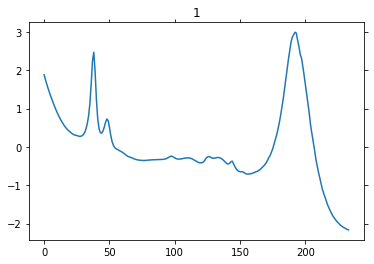

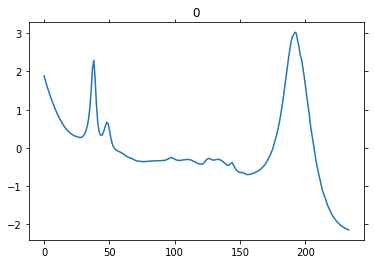

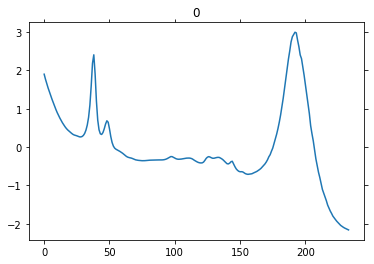

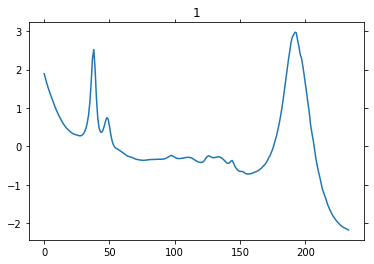

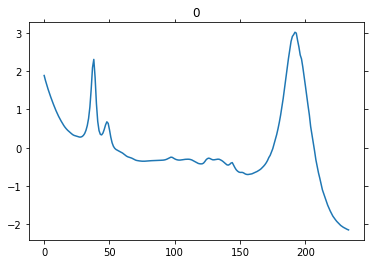

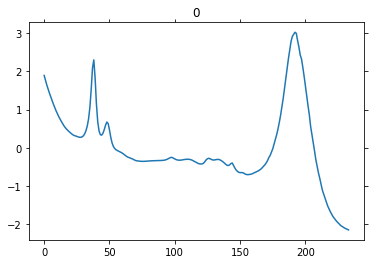

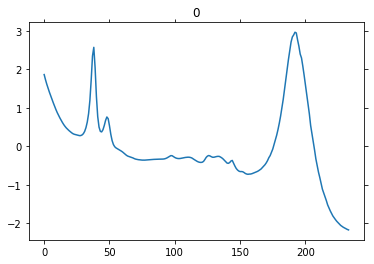

In [ ]:
dloaders.train.show_batch()

In [ ]:
from torchtools.models import *

In [ ]:
from fastai2.torch_core import *
from fastai2.data.all import *
from fastai2.basics import *

In [ ]:
dloaders.c

2

In [ ]:
#cuda
learn = Learner(dloaders, InceptionTime(3,8), metrics=accuracy)

timenormal
ynormal
yscale
ywarp
timenormal
ynormal
timenormal
ywarp
timenormal
yscale
ynormal
ywarp
timewarp
timenormal
yscale
ywarp
timewarp
yscale
ywarp
timewarp
yscale
timenormal
ynormal
yscale
ywarp
timenormal
ywarp
yscale
yscale
ynormal
ynormal
yscale
ywarp
ynormal
yscale
timenormal
ynormal
yscale
timenormal
timewarp
ywarp
timewarp
yscale
timewarp
timewarp
timenormal
timewarp
yscale
timenormal
ynormal
ywarp
timenormal
ynormal
ywarp
ynormal
timewarp
timenormal
ynormal
timenormal
timewarp
timenormal
ynormal
timenormal
ynormal
ynormal
timewarp
ywarp
timewarp
yscale
timewarp
yscale
timewarp
ywarp
timewarp
ynormal
timewarp
ywarp
timenormal
ynormal
yscale
ynormal
ywarp
timenormal
timewarp
ywarp
yscale
ynormal
timewarp
yscale
ynormal
ynormal
ywarp
ynormal
timewarp
ywarp
yscale
yscale
ynormal
ywarp
timewarp
timenormal
ywarp
yscale
ynormal
timenormal
ynormal
ywarp
timenormal
yscale
ywarp
timenormal
yscale
yscale
timewarp
timenormal
timewarp
timewarp
timenormal
timewarp
ynormal
timewarp
ywa

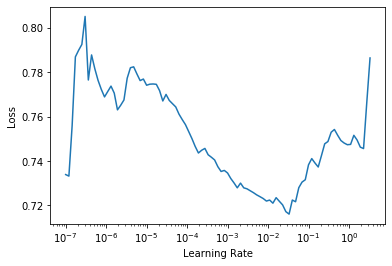

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(50, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.910427,2.058991,0.125000,00:01
1,1.723514,1.786480,0.506250,00:01
2,1.528069,1.262397,0.684375,00:01
3,1.345598,0.952275,0.743750,00:01
4,1.195087,0.869528,0.706250,00:01
5,1.037891,0.754646,0.784375,00:01
6,0.962997,1.431045,0.537500,00:01
7,0.925001,3.001335,0.340625,00:01
8,0.837837,1.575452,0.515625,00:01
9,0.791773,1.085520,0.703125,00:01


yscale
ywarp
timenormal
timewarp
timenormal
timewarp
yscale
timewarp
timenormal
timewarp
yscale
ynormal
ywarp
ynormal
timewarp
yscale
timewarp
yscale
yscale
ywarp
timenormal
yscale
timenormal
ynormal
yscale
ywarp
timenormal
yscale
ynormal
ywarp
timenormal
timewarp
ywarp
yscale
timenormal
ynormal
timenormal
timewarp
timenormal
yscale
ynormal
yscale
ynormal
ywarp
yscale
timewarp
ywarp
ynormal
timenormal
ynormal
ywarp
timenormal
ynormal
timewarp
timewarp
yscale
timenormal
ywarp
ynormal
ywarp
yscale
timewarp
yscale
timewarp
timewarp
ywarp
timewarp
timenormal
yscale
ynormal
ynormal
ywarp
timenormal
timewarp
timewarp
ynormal
yscale
ywarp
ynormal
ywarp
ywarp
ynormal
ynormal
timenormal
ywarp
timewarp
yscale
ywarp
ywarp
timenormal
timenormal
ynormal
ywarp
yscale
timenormal
ynormal
ynormal
yscale
ynormal
yscale
ynormal
ywarp
timewarp
yscale
timewarp
ywarp
timenormal
yscale
timenormal
ywarp
timewarp
timenormal
ywarp
timenormal
ynormal
timewarp
timenormal
yscale
yscale
ynormal
timewarp
yscale
ynor

ywarp
ynormal
yscale
timenormal
timewarp
ywarp
yscale
timenormal
ywarp
timewarp
yscale
ynormal
ywarp
timewarp
timewarp
yscale
ywarp
timenormal
timenormal
timewarp
timewarp
yscale
ynormal
timewarp
yscale
timewarp
ywarp
timewarp
timenormal
timewarp
timewarp
yscale
timewarp
ywarp
timenormal
ynormal
ynormal
ywarp
yscale
timewarp
timewarp
timenormal
timewarp
ywarp
ynormal
timenormal
timewarp
timenormal
ynormal
yscale
yscale
timenormal
yscale
ywarp
ynormal
ywarp
timenormal
yscale
yscale
ynormal
ywarp
ynormal
timenormal
ywarp
ynormal
ywarp
timenormal
yscale
yscale
ywarp
ynormal
timenormal
timewarp
timenormal
yscale
timenormal
timewarp
yscale
timenormal
ynormal
yscale
ywarp
yscale
timewarp
ywarp
timewarp
timenormal
ywarp
yscale
timenormal
timenormal
ynormal
ynormal
timenormal
ynormal
timenormal
yscale
timenormal
timenormal
ynormal
timenormal
yscale
timewarp
ynormal
ynormal
yscale
yscale
timenormal
yscale
ywarp
ywarp
timewarp
ywarp
yscale
ywarp
yscale
yscale
timenormal
timewarp
timenormal
ynorm

In [ ]:
learn.fit_one_cycle(50, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.969288,2.072256,0.200000,00:01
1,1.770903,1.838587,0.500000,00:01
2,1.580220,1.237248,0.712500,00:01
3,1.394947,0.968883,0.743750,00:01
4,1.266358,1.031001,0.631250,00:01
5,1.107616,1.087917,0.646875,00:01
6,1.099880,0.943391,0.668750,00:02
7,0.998527,0.904510,0.743750,00:01
8,0.964991,1.198830,0.575000,00:01
9,0.863990,0.850304,0.781250,00:01


timenormal
yscale
timenormal
yscale
ynormal
yscale
ynormal
ywarp
timewarp
ywarp
ywarp
timewarp
timewarp
ywarp
ynormal
timenormal
timenormal
yscale
yscale
timenormal
yscale
timenormal
timewarp
ynormal
ywarp
timenormal
ynormal
yscale
ynormal
timewarp
timenormal
yscale
timenormal
ynormal
yscale
ywarp
timenormal
ynormal
ywarp
timenormal
ynormal
timewarp
timewarp
ywarp
timenormal
timewarp
ynormal
ywarp
yscale
timenormal
timenormal
ynormal
yscale
timenormal
timenormal
ynormal
ynormal
timenormal
timewarp
yscale
timewarp
yscale
ywarp
yscale
timewarp
timenormal
yscale
timenormal
yscale
timenormal
timenormal
timewarp
yscale
timenormal
yscale
timewarp
yscale
ywarp
timewarp
ywarp
ywarp
ynormal
timewarp
ywarp
timewarp
ynormal
timenormal
yscale
timewarp
ywarp
ywarp
yscale
yscale
ynormal
timewarp
ywarp
ywarp
ynormal
ywarp
ynormal
timenormal
ywarp
timewarp
timenormal
ynormal
timewarp
timewarp
yscale
ywarp
timewarp
ywarp
yscale
timewarp
ynormal
ynormal
timewarp
ynormal
yscale
ynormal
ywarp
timewarp
tim

ywarp
yscale
timewarp
ywarp
yscale
ynormal
timenormal
ywarp
ywarp
timenormal
timenormal
ywarp
ywarp
ynormal
timewarp
timenormal
ywarp
timenormal
timenormal
timewarp
ynormal
yscale
yscale
ynormal
ywarp
yscale
timewarp
ynormal
ynormal
ywarp
timenormal
yscale
timewarp
ywarp
yscale
timenormal
timenormal
yscale
timenormal
ywarp
ywarp
timewarp
timewarp
ynormal
ywarp
timenormal
timenormal
yscale
ynormal
timenormal
yscale
ynormal
yscale
timenormal
yscale
timewarp
ynormal
ywarp
ynormal
timenormal
timenormal
ywarp
yscale
timewarp
yscale
ywarp
timenormal
ynormal
timewarp
yscale
yscale
timewarp
timenormal
ynormal
ynormal
ywarp
timenormal
yscale
timewarp
ynormal
ynormal
ywarp
timewarp
timenormal
yscale
timenormal
ywarp
timenormal
timenormal
ynormal
ywarp
timewarp
ynormal
yscale
ynormal
ywarp
timewarp
timenormal
timenormal
timewarp
timenormal
ynormal
ynormal
timewarp
ynormal
timewarp
timenormal
ywarp
ynormal
timewarp
timewarp
ynormal
yscale
ynormal
ynormal
yscale
ynormal
ywarp
timewarp
yscale
yscale

In [ ]:
learn.fit_one_cycle(10, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.948434,2.020151,0.234375,00:01
1,1.567360,1.467754,0.396875,00:01
2,1.355849,2.331620,0.434375,00:01
3,1.212197,0.993076,0.709375,00:01
4,1.030451,0.658669,0.787500,00:01
5,0.879349,0.640554,0.828125,00:01
6,0.732076,0.603749,0.803125,00:01
7,0.615003,0.497322,0.890625,00:01
8,0.507467,0.459992,0.893750,00:01
9,0.434670,0.451862,0.903125,00:01


In [ ]:
x,y = dloaders.one_batch()

x.mean((0,2)), x.std((0,2))

In [ ]:
x,y = dloaders.one_batch()

x.mean((0,2)), x.std((0,2))

yscale
timewarp


(TSTensor([-0.0100, -0.0117,  0.0011], device='cuda:0'),
 TSTensor([1.0111, 1.0019, 1.0120], device='cuda:0'))